In [1]:
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
user_summary = pd.read_csv('../data/user_summary.csv')

In [3]:
user_summary.head()

,user_id,total_orders,total_products,min_products,max_products,med_products,avg_products,std_products,max_reordered,med_reordered,avg_reordered,std_reordered,mode_day_of_week,mode_hour_of_day,total_days,min_days,max_days,med_days,avg_days,std_days
0,1,11,70,4,11,6.0,6.363636,2.110579,1.000000,0.666667,0.724311,0.307419,4,8,65,0.0,30.0,19.0,19.200000,8.791331
1,2,15,226,5,31,14.0,15.066667,7.055562,0.888889,0.562500,0.443903,0.304708,1,11,213,3.0,30.0,13.0,18.009390,9.778196
2,3,12,88,5,11,7.0,7.333333,2.103388,1.000000,0.763889,0.658817,0.333725,0,16,78,7.0,21.0,10.0,11.487179,4.869048
3,4,5,18,2,7,3.0,3.600000,2.073644,0.142857,0.000000,0.028571,0.063888,4,15,14,0.0,21.0,20.0,15.357143,8.580901
4,5,5,46,5,12,9.0,9.200000,2.683282,0.666667,0.444444,0.391111,0.242212,0,18,35,6.0,19.0,11.0,12.314286,5.251170


### All

In [30]:
kmeans = KMeans()

In [32]:
df = user_summary.drop(['mode_day_of_week','mode_hour_of_day','user_id'], axis=1)
df

,total_orders,total_products,min_products,max_products,med_products,avg_products,std_products,max_reordered,med_reordered,avg_reordered,std_reordered,total_days,min_days,max_days,med_days,avg_days,std_days
0,11,70,4,11,6.0,6.363636,2.110579,1.000000,0.666667,0.724311,0.307419,65,0.0,30.0,19.0,19.200000,8.791331
1,15,226,5,31,14.0,15.066667,7.055562,0.888889,0.562500,0.443903,0.304708,213,3.0,30.0,13.0,18.009390,9.778196
2,12,88,5,11,7.0,7.333333,2.103388,1.000000,0.763889,0.658817,0.333725,78,7.0,21.0,10.0,11.487179,4.869048
3,5,18,2,7,3.0,3.600000,2.073644,0.142857,0.000000,0.028571,0.063888,14,0.0,21.0,20.0,15.357143,8.580901
4,5,46,5,12,9.0,9.200000,2.683282,0.666667,0.444444,0.391111,0.242212,35,6.0,19.0,11.0,12.314286,5.251170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,4,51,7,19,12.5,12.750000,6.130525,0.857143,0.282895,0.355733,0.360894,34,10.0,30.0,10.0,14.705882,8.611231
206205,67,285,1,24,4.0,4.253731,3.230270,1.000000,0.500000,0.570676,0.312977,281,0.0,15.0,3.0,4.042705,3.453511
206206,16,223,5,25,13.0,13.937500,6.038419,1.000000,0.645833,0.637144,0.310794,199,1.0,30.0,16.0,14.879397,11.293850
206207,49,677,4,28,13.0,13.816327,5.592679,1.000000,0.750000,0.700368,0.232872,665,0.0,20.0,7.0,7.442105,4.022531


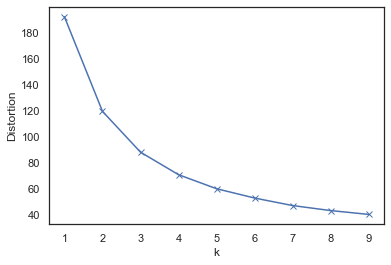

In [33]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [34]:
kmeans.set_params(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
kmeans.cluster_centers_

array([[3.24874258e+01, 3.58552267e+02, 4.24519698e+00, 2.59575823e+01,
        1.26333378e+01, 1.31627068e+01, 5.59513172e+00, 9.74758779e-01,
        6.87927995e-01, 6.41546458e-01, 2.66206996e-01, 3.45250405e+02,
        2.16184566e+00, 2.66273610e+01, 9.30163249e+00, 1.08137810e+01,
        6.42590842e+00],
       [1.00994493e+01, 8.01391456e+01, 4.14369458e+00, 1.52619745e+01,
        8.50833567e+00, 8.91310523e+00, 3.89350705e+00, 7.92223836e-01,
        4.19694478e-01, 4.14501090e-01, 2.94210498e-01, 7.11801301e+01,
        7.23015651e+00, 2.70998600e+01, 1.72198855e+01, 1.72119822e+01,
        7.11774626e+00],
       [6.14109297e+01, 9.05275491e+02, 3.85237757e+00, 3.44732671e+01,
        1.58872132e+01, 1.64180158e+01, 6.96413968e+00, 9.97443054e-01,
        8.14610756e-01, 7.56993541e-01, 2.29230879e-01, 8.88072747e+02,
        9.93730778e-01, 2.14966880e+01, 5.74982257e+00, 6.70477799e+00,
        4.06510220e+00]])

In [36]:
kmeans.labels_

array([1, 0, 1, ..., 1, 2, 1], dtype=int32)

### Sans Standard Deviation

In [37]:
df2 = user_summary.drop(['mode_day_of_week','mode_hour_of_day','user_id','std_products',\
                         'std_reordered','std_days'], axis=1)
df2

,total_orders,total_products,min_products,max_products,med_products,avg_products,max_reordered,med_reordered,avg_reordered,total_days,min_days,max_days,med_days,avg_days
0,11,70,4,11,6.0,6.363636,1.000000,0.666667,0.724311,65,0.0,30.0,19.0,19.200000
1,15,226,5,31,14.0,15.066667,0.888889,0.562500,0.443903,213,3.0,30.0,13.0,18.009390
2,12,88,5,11,7.0,7.333333,1.000000,0.763889,0.658817,78,7.0,21.0,10.0,11.487179
3,5,18,2,7,3.0,3.600000,0.142857,0.000000,0.028571,14,0.0,21.0,20.0,15.357143
4,5,46,5,12,9.0,9.200000,0.666667,0.444444,0.391111,35,6.0,19.0,11.0,12.314286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,4,51,7,19,12.5,12.750000,0.857143,0.282895,0.355733,34,10.0,30.0,10.0,14.705882
206205,67,285,1,24,4.0,4.253731,1.000000,0.500000,0.570676,281,0.0,15.0,3.0,4.042705
206206,16,223,5,25,13.0,13.937500,1.000000,0.645833,0.637144,199,1.0,30.0,16.0,14.879397
206207,49,677,4,28,13.0,13.816327,1.000000,0.750000,0.700368,665,0.0,20.0,7.0,7.442105


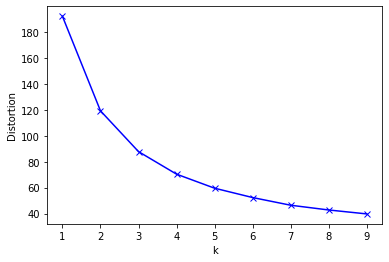

In [40]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df2)
    kmeanModel.fit(df2)
    distortions.append(sum(np.min(cdist(df2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df2.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

### total_orders, total_products, med_reordered, total_days, med_days

In [8]:
df3 = user_summary[['total_orders', 'total_products', 'med_reordered', 'total_days', 'med_days']]
df3

,total_orders,total_products,med_reordered,total_days,med_days
0,11,70,0.666667,65,19.0
1,15,226,0.562500,213,13.0
2,12,88,0.763889,78,10.0
3,5,18,0.000000,14,20.0
4,5,46,0.444444,35,11.0
...,...,...,...,...,...
206204,4,51,0.282895,34,10.0
206205,67,285,0.500000,281,3.0
206206,16,223,0.645833,199,16.0
206207,49,677,0.750000,665,7.0


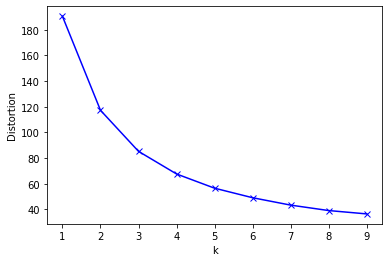

In [9]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df3)
    kmeanModel.fit(df3)
    distortions.append(sum(np.min(cdist(df3, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df3.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

### Correlations

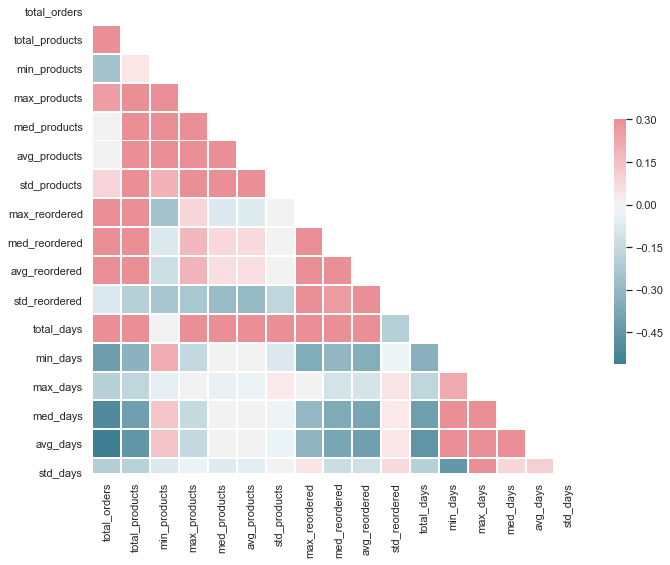

In [24]:
# Check Correlations Between Variables
from string import ascii_letters
sns.set(style="white")

# Compute the correlation matrix
corr = user_summary.drop(['user_id'],axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.5})

### Helper Function for K-Means Elbow Plot: 2 Columns 

In [38]:
def kmeans_model_2 (user_summary, series1, series2):
    sample = user_summary[[series1, series2]]
    
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(sample)
        kmeanModel.fit(sample)
        distortions.append(sum(np.min(cdist(sample, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / sample.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.show()

### med_reordered, total_products

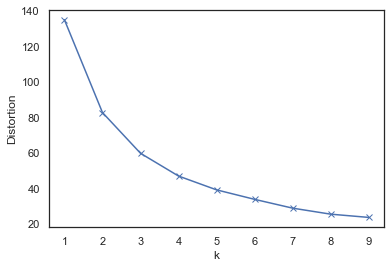

In [39]:
kmeans_model_2 (user_summary, 'med_reordered', 'total_products')

### avg_products, total_orders

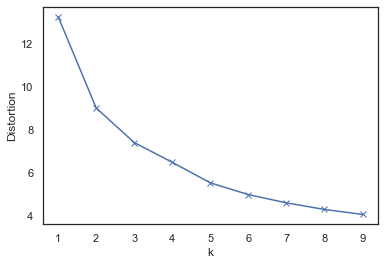

In [28]:
kmeans_model_2 (user_summary, 'avg_products', 'total_orders')

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

def linkage_frame(df):
    row_clusters = linkage(df, method='complete', metric='euclidean')
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df

In [ ]:
linkage_df = linkage_frame(df)
linkage_df.head()

In [ ]:
row_dendr = dendrogram(user_summary, leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()